# Prediction using Supervised ML

### To predict the percentage of marks of an student based on the number of study hours

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data 
df=pd.read_csv('student_info.csv')
print('Data imported sucessfully')
df.head()


Data imported sucessfully


,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
#Checking for nan Values
df.isna()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [4]:
# Filling the nan values with the mean 
df=df.fillna(df.mean())

In [5]:
#Now our Data frame has no Nan values 
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


Lets plot our data on 2-D graph to eyeball our dataste and see if we can manually find any relationship between the data. 

# PLotting the distribution of Scores Method-1

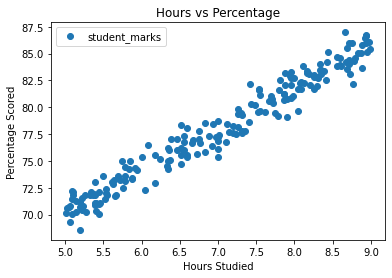

In [6]:
df.plot(x='study_hours',y='student_marks',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

# PLotting the distribution of Scores Method-2

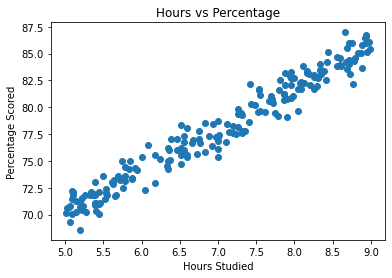

In [7]:
plt.scatter(df['study_hours'],df['student_marks'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

#### From the above Graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

In [8]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


# Simple Linear Regression Model (SLRM)

#### From the above Graph as it's clearl that there is a positive linear relation between the number of hours studied and percentage of score. Hence we use SLRM

### Preparing the data 

the next step is to divide the data into "attributes"(inputs) and "labels"(outputs)

#### Method1

In [9]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

#### Method 2

In [10]:
x=df[['study_hours']].values
y=df[['student_marks']].values

In [11]:
x,y

(array([[6.83      ],
        [6.56      ],
        [6.99594872],
        [5.67      ],
        [8.67      ],
        [7.55      ],
        [6.67      ],
        [8.99      ],
        [5.19      ],
        [6.75      ],
        [6.59      ],
        [8.56      ],
        [7.75      ],
        [7.9       ],
        [8.19      ],
        [6.55      ],
        [6.36      ],
        [8.44      ],
        [8.41      ],
        [7.67      ],
        [7.42      ],
        [8.16      ],
        [5.05      ],
        [5.85      ],
        [5.45      ],
        [7.96      ],
        [6.51      ],
        [6.73      ],
        [5.94      ],
        [7.48      ],
        [8.13      ],
        [6.99594872],
        [5.4       ],
        [8.78      ],
        [8.72      ],
        [7.1       ],
        [7.86      ],
        [7.19      ],
        [5.62      ],
        [7.88      ],
        [5.28      ],
        [8.92      ],
        [5.46      ],
        [8.3       ],
        [8.09      ],
        [6

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by  using Scikit-Learns built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.2,random_state=0)

##### Random_state is basically used for reproducing your problem the same every time it is run. If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue.

# Training the model

Now, As we have split our data into training and testing sets,Hence its finally the time to train our Algorithm

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train) # This code fits/ trains our model

print("Training Complete")

Training Complete


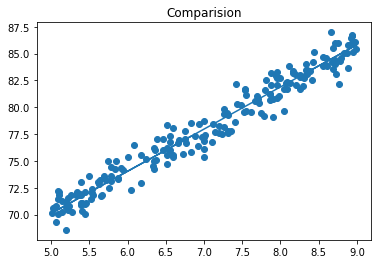

In [14]:
# PLotting the regression line 
line = regressor.coef_*x+regressor.intercept_ 
# its in the form y= mx + c( y=line, slope= regressor.coef_ & c=regressor.intercept_ )

#Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.title('Comparision')
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to make some predicitons

In [15]:
print(x_test) #Testing data -- IN hours
y_pred= regressor.predict(x_test)# Predicting the scores

[[8.41      ]
 [5.19      ]
 [5.72      ]
 [8.88      ]
 [5.79      ]
 [8.66      ]
 [7.55      ]
 [7.99      ]
 [7.75      ]
 [8.08      ]
 [7.26      ]
 [8.75      ]
 [6.97      ]
 [6.93      ]
 [8.34      ]
 [8.99      ]
 [8.78      ]
 [5.64      ]
 [7.19      ]
 [7.31      ]
 [8.61      ]
 [8.95      ]
 [6.18      ]
 [7.86      ]
 [5.49      ]
 [7.62      ]
 [7.26      ]
 [8.05      ]
 [6.99594872]
 [8.09      ]
 [6.36      ]
 [8.69      ]
 [5.39      ]
 [6.37      ]
 [5.05      ]
 [7.26      ]
 [6.33      ]
 [8.67      ]
 [6.01      ]
 [5.34      ]]


In [16]:
y_test, y_pred

(array([[82.5 ],
        [71.18],
        [73.25],
        [83.64],
        [73.64],
        [86.99],
        [81.18],
        [82.75],
        [79.5 ],
        [81.7 ],
        [79.41],
        [85.95],
        [77.19],
        [78.45],
        [84.  ],
        [85.46],
        [84.35],
        [73.19],
        [78.21],
        [77.59],
        [83.87],
        [85.15],
        [72.96],
        [80.72],
        [73.61],
        [79.53],
        [78.17],
        [79.63],
        [76.83],
        [82.38],
        [76.04],
        [85.48],
        [71.87],
        [75.04],
        [70.67],
        [79.87],
        [74.49],
        [84.19],
        [75.36],
        [72.1 ]]),
 array([[83.50507271],
        [70.84927186],
        [72.93236952],
        [85.35234799],
        [73.20749562],
        [84.48766595],
        [80.12495199],
        [81.85431608],
        [80.91102657],
        [82.20804964],
        [78.98514384],
        [84.84139951],
        [77.84533568],
        [77.6881207

### *Here as y_test and y_pred are 2-D arrays, Hence While Passing as an arg in a dictionary it throws "ValueError: If using all scalar values, you must pass an index"and "its Dimension must be 1 Dimensional" Errors. Hence we need to convert that 2-D array to 1-D array using flatten()

In [17]:
df_compar=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df_compar.head()

,Actual,Predicted
0,82.50,83.505073
1,71.18,70.849272
2,73.25,72.932370
3,83.64,85.352348
4,73.64,73.207496


In [18]:
score_pred=np.array([7])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print("No of hours={}".format(7))
print("Predicted Score={}".format(predict[0][0]))

No of hours=7
Predicted Score=77.96324687251035


## Evaluating the Model

The final step is to evaluate the performance of algorithm. This Step is particularly
important to compare how well different algorithms performed on particular
dataset. For simplicity here, we have chosen the mean absolute error.
THere are many such metrics

Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). ... MAE is more robust to data with outliers. The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

Here We can use MAE as there could be the fear of outliers

In [19]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.8574561538746253
